# Gaussian Mixture Model

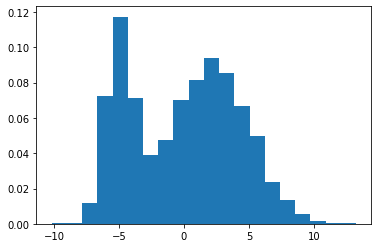

-4.990607834087002
1.0313666456030592
2.0218225427929006
9.138492316812595


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture
x1 = np.random.normal(-5, 1, 3000)
x2 = np.random.normal(2,3,7000)
x = np.concatenate((x1,x2))
plt.hist(x, bins=20, density=1)
plt.show()

print(np.mean(x1))
print(np.var(x1, ddof=1))
print(np.mean(x2))
print(np.var(x2, ddof=1))

In [11]:
#30% of x data is x1, 70% in x is x2

gmm = mixture.GaussianMixture(n_components=2)
gmm.fit(x.reshape(-1,1))
print(gmm.means_)
print(gmm.covariances_)
print(gmm.weights_)

[[ 2.0926663 ]
 [-4.87635798]]
[[[8.20849226]]

 [[1.18686321]]]
[0.67712718 0.32287282]


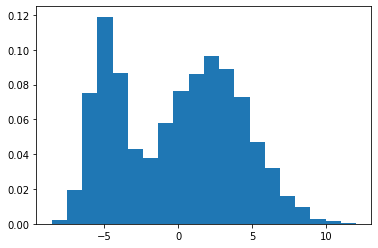

In [16]:
z = gmm.sample(10000)
plt.hist(z[0], bins=20, density=1)
plt.show()

# Kernel Density Estimation (KDE)

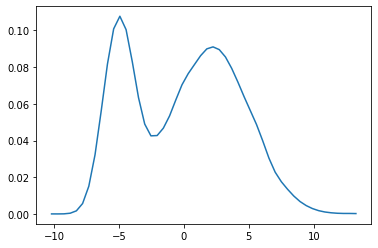

In [21]:
#apply kde to previous generated sample data x
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=0.6)
kde.fit(x.reshape(-1,1))
s=np.linspace(np.min(x), np.max(x))
log_pdf=kde.score_samples(s.reshape(-1,1))
plt.plot(s,np.exp(log_pdf))

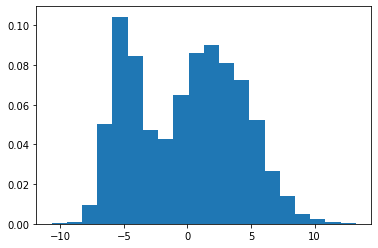

In [24]:
m =kde.sample(10000)
plt.hist(m, bins=20, density =1)
plt.show()

In [25]:
#kde can be used in machine learning to estimate images based on previous data

# Correlation

0.8717541573048714
(0.8717541573048713, 1.0384540627941062e-47)


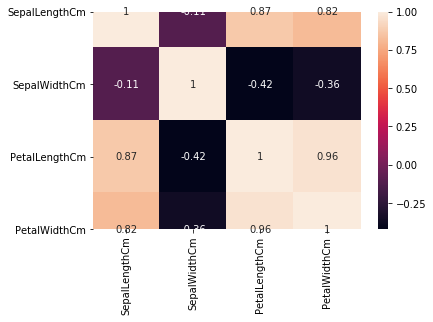

In [32]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import scipy.stats

df = pd.read_csv('Iris.csv')
df = df.drop(columns=['Id', 'Species'])
sns.heatmap(df.corr(), annot=True)

def pearson_corr(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    num = [(i - x_mean)*(j - y_mean) for i,j in zip(x,y)]
    den_1 = [(i - x_mean)**2 for i in x]
    den_2 = [(j - y_mean)**2 for j in y]
    correlation_x_y = np.sum(num)/np.sqrt(np.sum(den_1))/np.sqrt(np.sum(den_2))
    return correlation_x_y

print(pearson_corr(df['SepalLengthCm'], df['PetalLengthCm']))
print(scipy.stats.pearsonr(df['SepalLengthCm'], df['PetalLengthCm']))

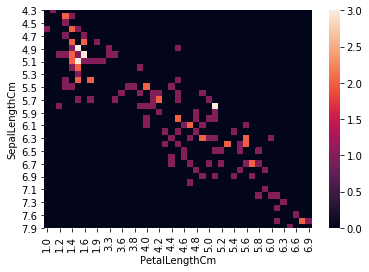

In [35]:
sns.heatmap(pd.crosstab(df['SepalLengthCm'], df['PetalLengthCm']))